## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
# Negin Baghbanzadeh

In [2]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('mosquitos_data.csv')

In [4]:
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


### PART 1

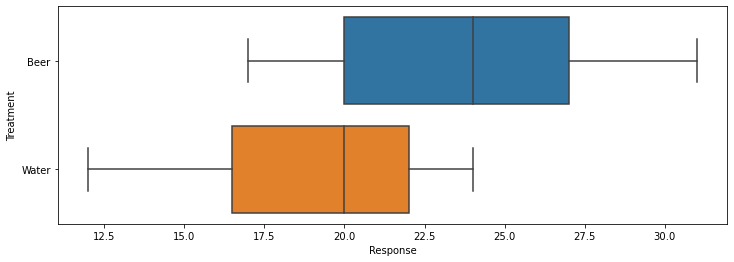

In [5]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="Response", y="Treatment", data=df)

This plot shows that the median of the beer group, is 24.5 and median of the water group is 20.<br/>
For the Water plot:
- first 25% of data is between 12 to 16
- second 25% of data is between 16 to 20
- third 25% of data is between 20 to 22
- last 25% of data is between 22 to 24<br/>
For the red plot(Water):
- first 25% of data is between 117.1 to 20
- second 25% of data is between 20 to 24
- third 25% of data is between 24 to 27.3
- last 25% of data is between 27.3 to 31.5<br/>
We also can see that half of beer data, is more than maximum of water data.

#### MEAN
center of the distribution of beer data for beer is 23.6 and for water is 19.22

In [6]:
df.groupby("Treatment")["Response"].mean()

Treatment
Beer     23.600000
Water    19.222222
Name: Response, dtype: float64

#### Median
The value in middle of the sorted list for beer is 24.0 and for water is 20.0.

In [7]:
df.groupby("Treatment")["Response"].median()

Treatment
Beer     24.0
Water    20.0
Name: Response, dtype: float64

#### Standard Deviation
For beer, the observation is 4.13 far from the mean.<br/>
For water, the observation is 3.67 far from the mean.

In [8]:
df.groupby("Treatment")["Response"].std()

Treatment
Beer     4.133199
Water    3.671120
Name: Response, dtype: float64

### PART 2

In [9]:
df_copy = copy.deepcopy(df)

In [10]:
df_copy["Response"] = np.random.permutation(df["Response"])

In [11]:
list_of_mean_differences = []
iterations = 10000
for i in range(iterations):
    df_copy["Response"] = np.random.permutation(df["Response"])
    df_copy.groupby("Treatment")["Response"].mean()
    new_mean = df_copy.groupby("Treatment")["Response"].mean()
    diff = new_mean["Beer"] - new_mean["Water"]
    list_of_mean_differences.append(round(diff, 1))

In [12]:
df_of_mean_differences = pd.DataFrame({})
df_of_mean_differences['mean_differences'] = list_of_mean_differences

In [13]:
df_of_mean_differences['ones'] = np.ones(len(df_of_mean_differences))

<AxesSubplot:xlabel='mean_differences'>

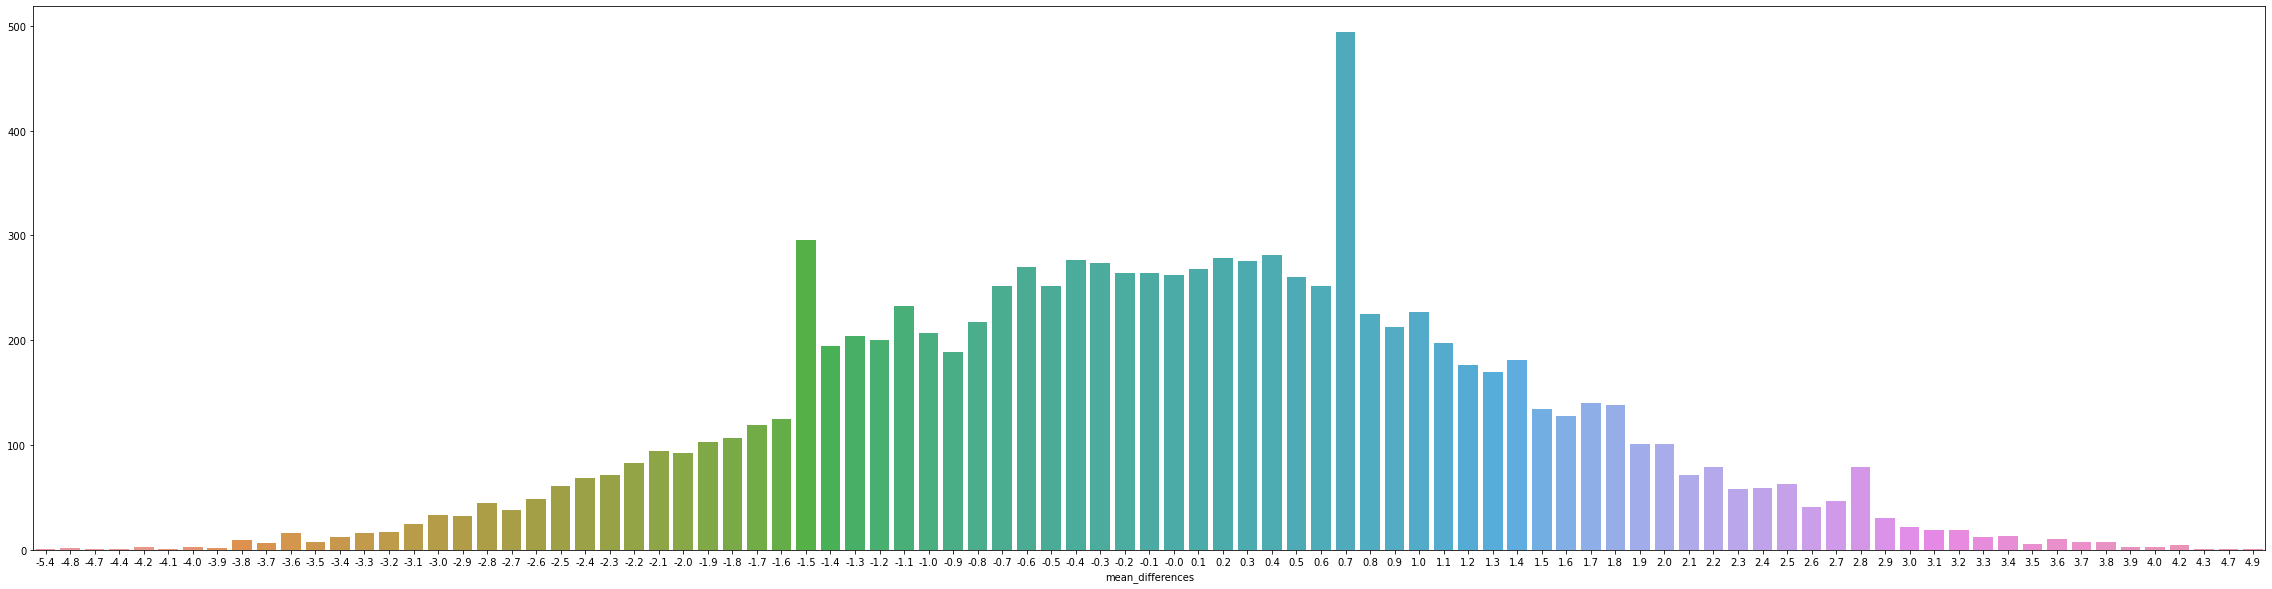

In [14]:
plt.figure(figsize=(40,10))
sns.barplot(x=df_of_mean_differences.groupby('mean_differences').count()['ones'].keys(), y=df_of_mean_differences.groupby('mean_differences').count()['ones'].values)

The chance of happening a 4.4 difference between the means is about:

In [15]:
times_4point4_happend = df_of_mean_differences.where(df_of_mean_differences['mean_differences'] >= 4.4).dropna().count()['mean_differences']
100*(times_4point4_happend/iterations)

0.02

As you can see the probability of having a 4.4 mean difference and higher, is about 0.02%. Since it a really small chance, it is safe to say that happening a 4.4 mean diffrence is not by chance and there an association and beer consumption does not attract more mosquitos.